In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
measurement_data = session.query(Measurement).first()
measurement_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x121d45d10>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
last_entry = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_entry 

('2017-08-23')

In [14]:

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)
#print("Query Date: ", query_date)
last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > query_date).order_by(Measurement.date).all()

In [15]:
precip = [item[1] for item in last_year_data]
dates = [item[0] for item in last_year_data]
df = pd.DataFrame({"Date": dates, "Precipitation": precip})
df = df.set_index('Date')
df.head(10)
#date_grouped = df.groupby('Date').sum()
#date_grouped

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


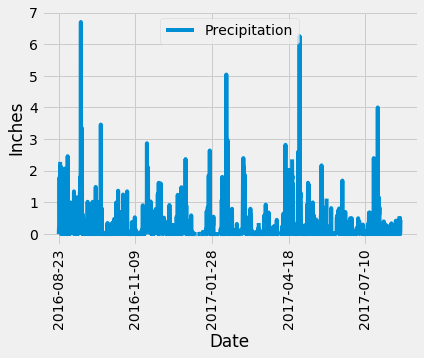

In [16]:
df.plot(rot=90)
plt.ylabel('Inches')
plt.show()


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_count = df['Precipitation'].count()
precip_max = df['Precipitation'].max()
precip_min = df['Precipitation'].min()
precip_mid = df['Precipitation'].median()
precip_mean = df['Precipitation'].mean()
quartiles = df['Precipitation'].quantile([.25,.5,.75])
precip_lowerQ = quartiles[0.25]
precip_upperQ = quartiles[0.75]
precip_std = df['Precipitation'].std()
precip_summary = {
    'count': precip_count,
    'mean': precip_mean,
    'std': precip_std,
    'min': precip_min,
    '25%': precip_lowerQ,
    '50%': precip_mid,
    '75%': precip_upperQ,
    'max': precip_max
}

In [18]:
#precip_sum_df = pd.DataFrame(precip_summary)
precip_summary

{'count': 2021,
 'mean': 0.17727857496288968,
 'std': 0.4611895038877035,
 'min': 0.0,
 '25%': 0.0,
 '50%': 0.02,
 '75%': 0.13,
 'max': 6.7}

In [19]:
measurement_data = session.query(Measurement).first()
measurement_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x121d45d10>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

In [20]:
# Design a query to show how many stations are available in this dataset?
station_num = session.query(Measurement.station).group_by(Measurement.station).count()
print(station_num)


9


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_id = station_activity[0][0]
most_active_high = session.query(func.max(Measurement.tobs)).filter_by(station=most_active_id).first()
most_active_low = session.query(func.min(Measurement.tobs)).filter_by(station=most_active_id).first()
most_active_mean = session.query(func.avg(Measurement.tobs)).filter_by(station=most_active_id).first()

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_temp_data = session.query(Measurement.tobs).filter_by(station=most_active_id).filter(Measurement.date > query_date).all()
active_temp_list = [item[0] for item in active_temp_data]
active_temp_list = pd.Series(active_temp_list)


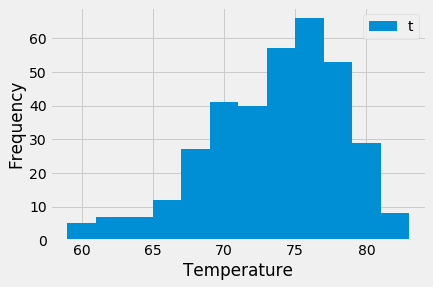

In [24]:
active_temp_list.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend('tobs')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
